Using kernel `conda_pytorch_latest_p36`

In [1]:
# !pip install fastai

In [2]:
classes = [
    'Agricolture',
    'Cross',
    'Education',
    'Food Security',
    'Health',
    'Livelihoods',
    'Logistics',
    'Nutrition',
    'Protection',
    'Shelter',
    'Wash'
]

In [3]:
import torch

In [4]:
from pathlib import Path
import os
import random
import pickle

In [5]:
import pandas as pd
from fastai.text.all import *
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [6]:
data = Path('data_prep/final_data/en/')
raw = pd.read_csv('data_prep/data/entries_raw.csv')

In [7]:
train = pd.read_csv(data / 'sentences_en_train.csv')
test = pd.read_csv(data / 'sentences_en_test.csv')

In [8]:
base = Path('/home/ec2-user/SageMaker/experiments-dfs/models/fastai/results')

In [9]:
binary_classification = pd.read_pickle(base / 'binary_classification.pickle')
pretrained_multi_label = pd.read_pickle(base / 'pretrained_multi_label.pickle')
multi_label_metrics = pd.read_pickle(base / 'multi_label_metrics.pickle')

In [13]:
val_metrics = {
    "Agriculture": [0.52, 0.36, 0.43, 83],
    "Cross": [0.49, 0.15, 0.23, 410],
    "Education": [0.72, 0.51, 0.60, 206],
    "Food Security": [0.78, 0.61, 0.69, 353],
    "Health": [0.88, 0.76, 0.82, 1134],
    "Livelihoods": [0.72, 0.44, 0.55, 320],
    "Logistics": [0.77, 0.22, 0.34, 125],
    "Nutrition": [0.80, 0.43, 0.56, 104],
    "Protection": [0.73, 0.51, 0.60, 381],
    "Shelter": [0.78, 0.45, 0.57, 175],
    "WASH": [0.87, 0.56, 0.68, 262],
}

In [18]:
recalls = [x[1] for x in val_metrics.values()]
precisions = [x[0] for x in val_metrics.values()]
fasttext = [x[2] for x in val_metrics.values()]
fasttext.append(np.mean(fasttext))

In [19]:
# recalls = [0.37, 0.15,0.51,0.61,0.77,0.44,0.22,0.44,0.51,0.46,0.58]
# precisions = [0.52,0.49,0.72,0.78,0.89,0.72,0.78,0.8,0.73,0.79,0.88]
# fasttext = [2*i*j / (i+j) for i, j in zip(recalls,precisions)]
# fasttext.append(np.mean(fasttext))

metrics = pd.DataFrame(
    {
        'binary_classification': binary_classification.f1_score,
        'multi_label_metrics': multi_label_metrics.f1_score,
        'pretrained_multi_label': pretrained_multi_label.f1_score,
        'fasttext': fasttext
    },
    index = multi_label_metrics.index,
)

<AxesSubplot:title={'center':'F1 Score'}, xlabel='class'>

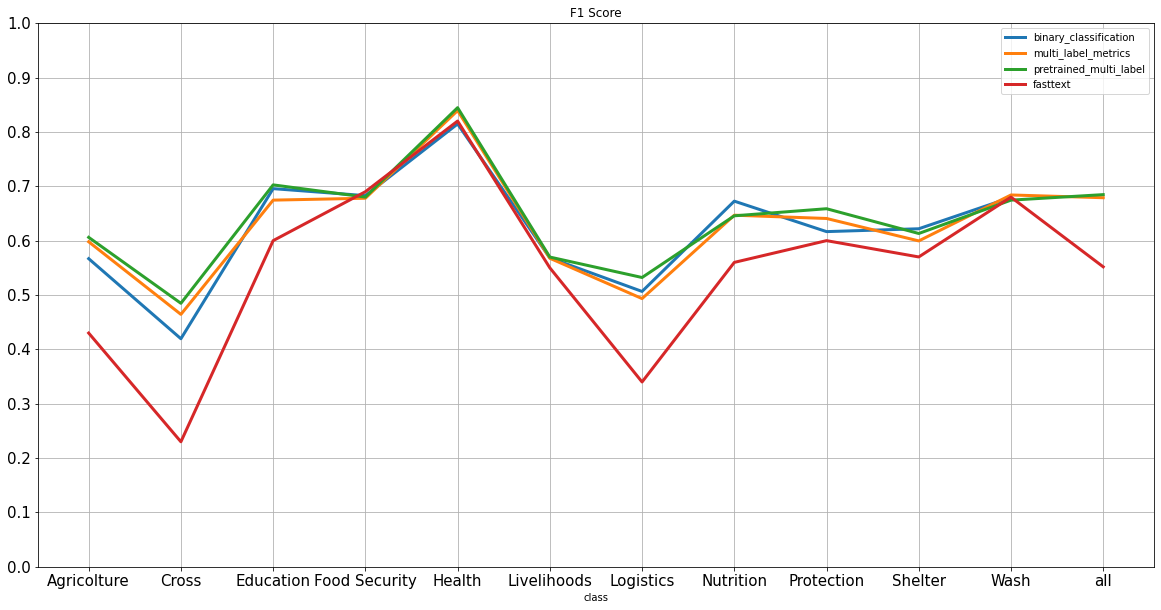

In [24]:
metrics.plot(
    figsize=(20, 10), 
    grid=True, 
    ylim=(0,1), 
    xticks=list(range(12)), 
    yticks=[x/10 for x in range(11)],
    linewidth=3,
    fontsize = 15,
    title='F1 Score'
)